## Task 1: Image Segmentation Using Thresholding (20 Marks)

#### (a) Load a grayscale image and implement the following thresholding methods to segment the image: • Binary Thresholding • Adaptive Thresholding • Otsu’s Thresholding (10 Marks)

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Load the image in grayscale
image_path = "images_input/lena.jpg"
grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [40]:
# Apply Binary Thresholding
_, binary_thresh = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)

# Apply Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(grayscale_image, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 
                                        blockSize=11, C=2)

# Apply Otsu’s Thresholding
_, otsu_thresh = cv2.threshold(grayscale_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#### (b) Display the original and segmented images side by side for comparison, ensuring each method is clearly labeled. (5 Marks)

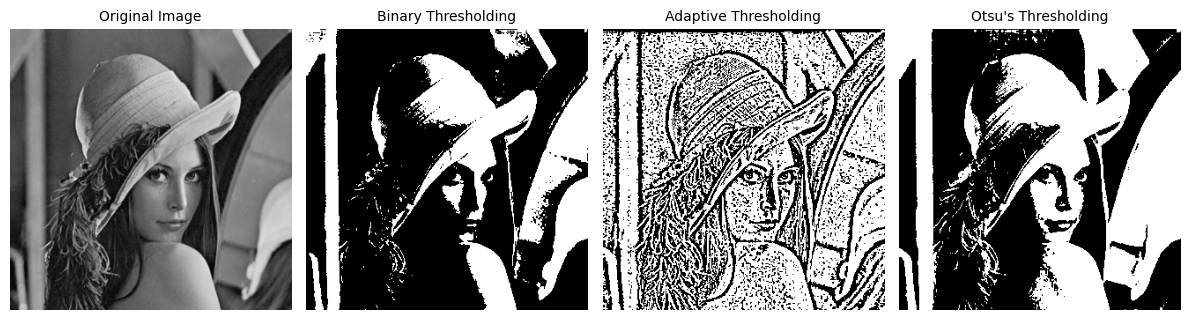

In [41]:
# Plot the results side by side
titles = ['Original Image', 'Binary Thresholding', 'Adaptive Thresholding', "Otsu's Thresholding"]
images = [grayscale_image, binary_thresh, adaptive_thresh, otsu_thresh]

# Create a side-by-side plot
plt.figure(figsize=(12, 6)) 
for i in range(4):
    plt.subplot(1, 4, i + 1) 
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


#### (c) In 2-3 sentences, discuss which method provided the best segmentation for your image and why. Consider factors like clarity of object boundaries and noise levels. (5 Marks)

The best segmentation method depends on the image's characteristics. **Otsu’s Thresholding** often provides superior results for images with bimodal histograms, as it automatically selects an optimal global threshold, yielding clear object boundaries. In contrast, **Adaptive Thresholding** is better for images with uneven illumination, as it dynamically adjusts thresholds based on local regions, effectively reducing noise.

### Task 2: Line Detection Using Hough Transform (20 Marks)

#### (a) Write a function to detect and highlight straight lines in an image using the Hough Line Transform. Make sure to use the Canny edge detector to preprocess the image before applying the Hough Transform. (10 Marks)

In [42]:
def detect_and_highlight_lines(image_path, canny_threshold1=50, canny_threshold2=150, hough_threshold=100):
    
    # Load the image
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(grayscale_image, canny_threshold1, canny_threshold2)

    # Apply Hough Line Transform
    lines = cv2.HoughLines(edges, 1, np.pi / 180, hough_threshold)

    # Draw the detected lines on the original image
    result_image = image.copy()
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Canny Edges")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title("Detected Lines")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    return result_image


#### (b) Test your function on an image with clear straight lines, such as a road, building, or grid structure. Display the original image and the processed image with highlighted lines. (5 Marks)

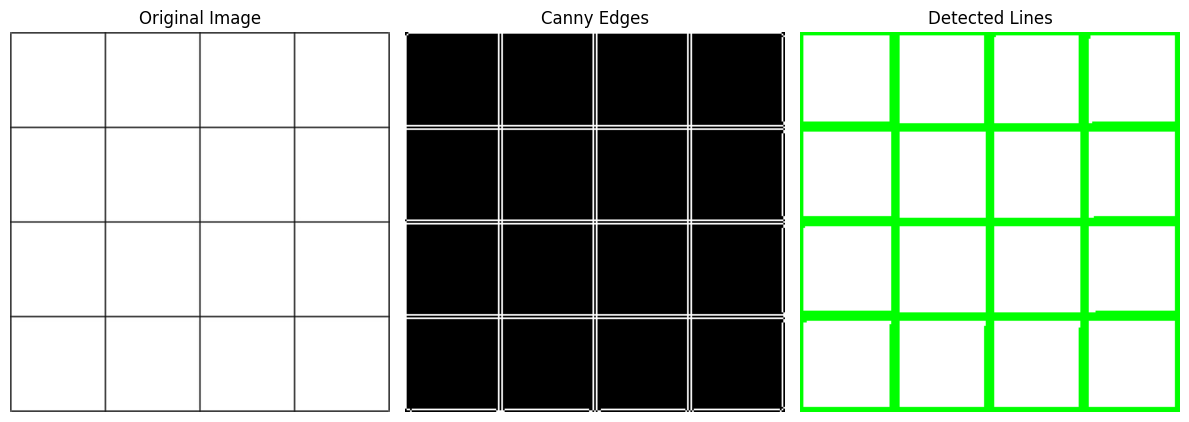

In [14]:
result = detect_and_highlight_lines("images_input/grid.png")

#### (c) Experiment with different threshold parameters in the Hough Transform to optimize line detection. In 2-3 sentences, describe the parameter changes and how they affected the results. (5 Marks)

In [45]:
def detect_and_experiment_lines(image_path, canny_threshold1=50, canny_threshold2=150, hough_thresholds=[50, 100, 150]):
    
    # Load the image
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(grayscale_image, canny_threshold1, canny_threshold2)

    # Experiment with different Hough thresholds
    plt.figure(figsize=(15, 8))
    plt.subplot(2, len(hough_thresholds) + 1, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2, len(hough_thresholds) + 1, 2)
    plt.imshow(edges, cmap="gray")
    plt.title("Canny Edges")
    plt.axis("off")

    for i, threshold in enumerate(hough_thresholds):
        # Apply Hough Line Transform
        lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)

        # Draw the detected lines
        result_image = image.copy()
        if lines is not None:
            for rho, theta in lines[:, 0]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(result_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Plot the results
        plt.subplot(2, len(hough_thresholds) + 1, i + 3)
        plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Hough Threshold = {threshold}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


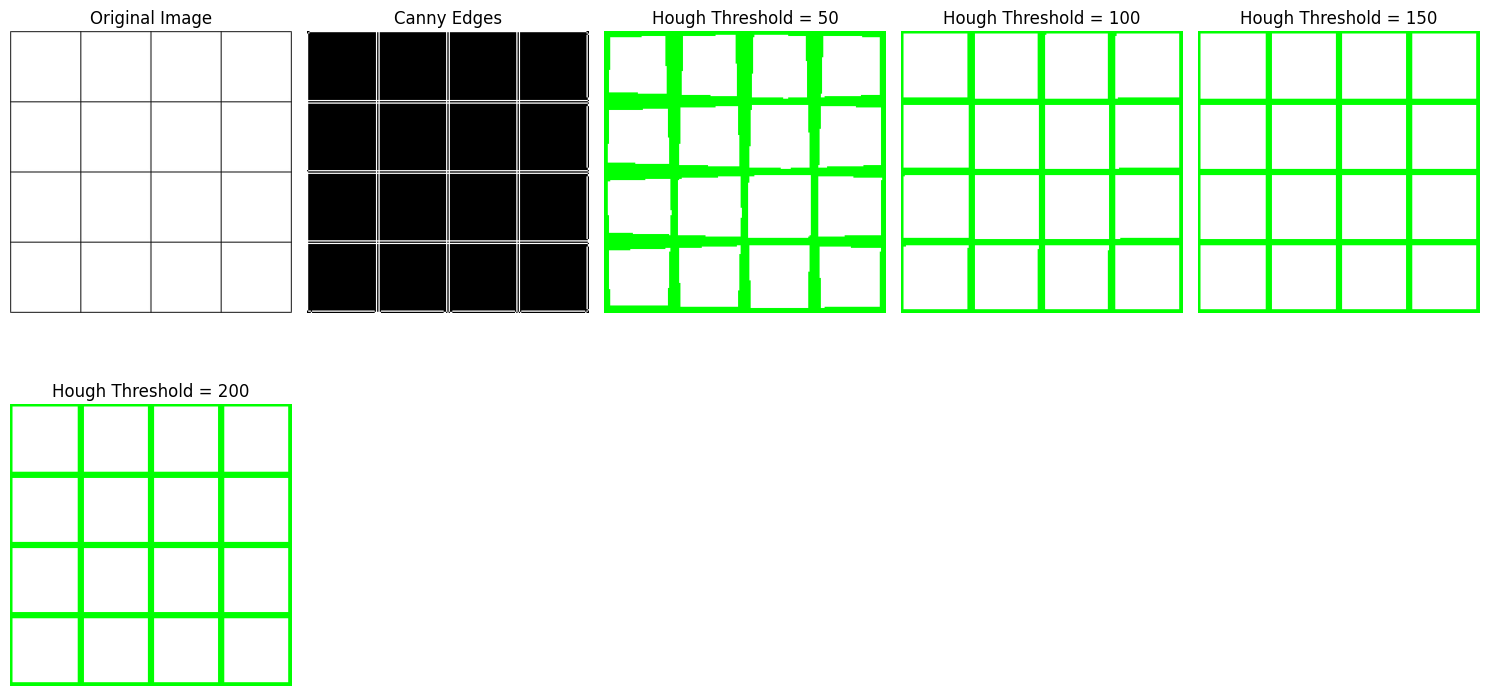

In [46]:
detect_and_experiment_lines("images_input/grid.png", hough_thresholds=[50, 100, 150, 200])

Low Threshold (e.g., 50):
Detects many lines, including weak or noisy ones.
Moderate Threshold (e.g., 100):
Detects most prominent lines while avoiding noise.
High Threshold (e.g., 150 or 200):
Detects only the strongest and most prominent lines, possibly missing some valid lines.

By analyzing the visual output, you can find the threshold value that balances noise reduction and accurate line detection for your specific image.

### Task 3: Circle Detection Using Hough Circle Transform (20 Marks)

#### (a) Implement a function to detect circles in an image using the Hough Circle Transform. Use suitable preprocessing steps (e.g., smoothing) to improve detection accuracy. (10 Marks)

In [ ]:
def detect_circles(image_path, dp=1.2, min_dist=20, param1=50, param2=30, min_radius=0, max_radius=0):
    
    # Load the image
    image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Preprocessing: Apply Gaussian blur to reduce noise
    smoothed_image = cv2.GaussianBlur(grayscale_image, (9, 9), 2)

    # Hough Circle Transform
    circles = cv2.HoughCircles(
        smoothed_image,
        cv2.HOUGH_GRADIENT,
        dp=dp,
        minDist=min_dist,
        param1=param1,
        param2=param2,
        minRadius=min_radius,
        maxRadius=max_radius
    )

    # Create a copy to draw circles on
    result_image = image.copy()

    # Draw the detected circles
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # Circle center (x, y)
            radius = circle[2]  # Circle radius
            # Draw the circle's perimeter
            cv2.circle(result_image, center, radius, (0, 255, 0), 2)
            # Draw the circle's center
            cv2.circle(result_image, center, 2, (0, 0, 255), 3)

    return grayscale_image, result_image


#### (b) Apply your function to an image with circular objects (e.g., coins,wheels, or round signs). Display the original image and the processed image with detected circles overlaid. (5 Marks)

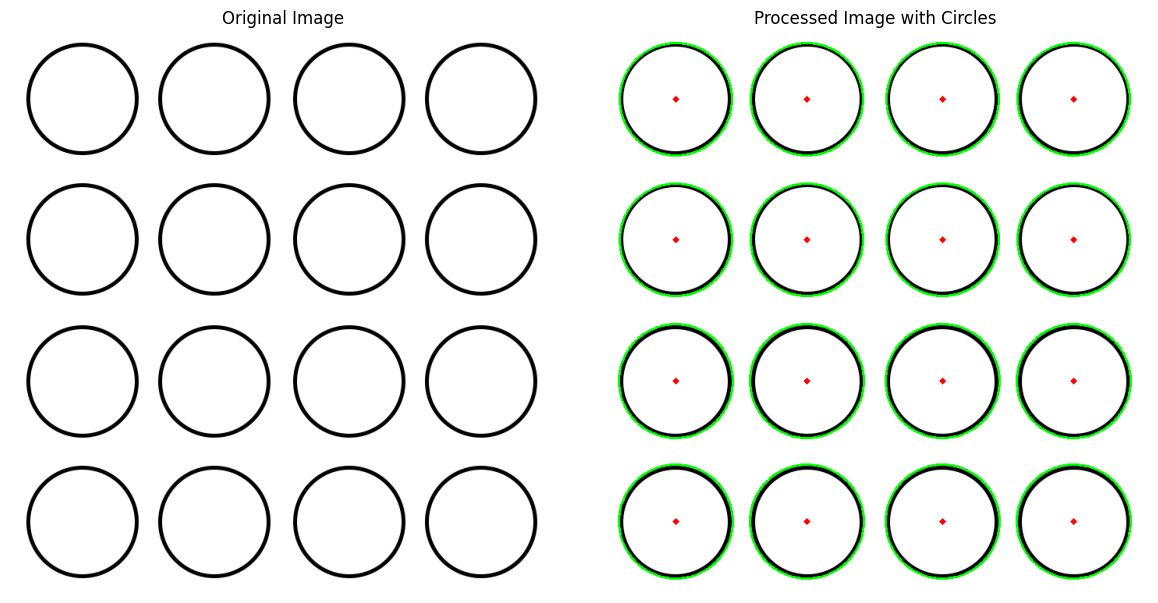

In [ ]:
# Apply the circle detection function
image_path = "images_input/circles.png" 
original_image, processed_image = detect_circles(
    image_path,
    dp=1.2,
    min_dist=30,
    param1=50,
    param2=40,
    min_radius=10,
    max_radius=100
)

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Processed Image with Circles")
plt.axis("off")

plt.tight_layout()
plt.show()


#### (c) Experiment with different radius ranges and accumulator thresholds. Display the results with and without these adjustments, and briefly explain any improvements observed. (5 Marks)

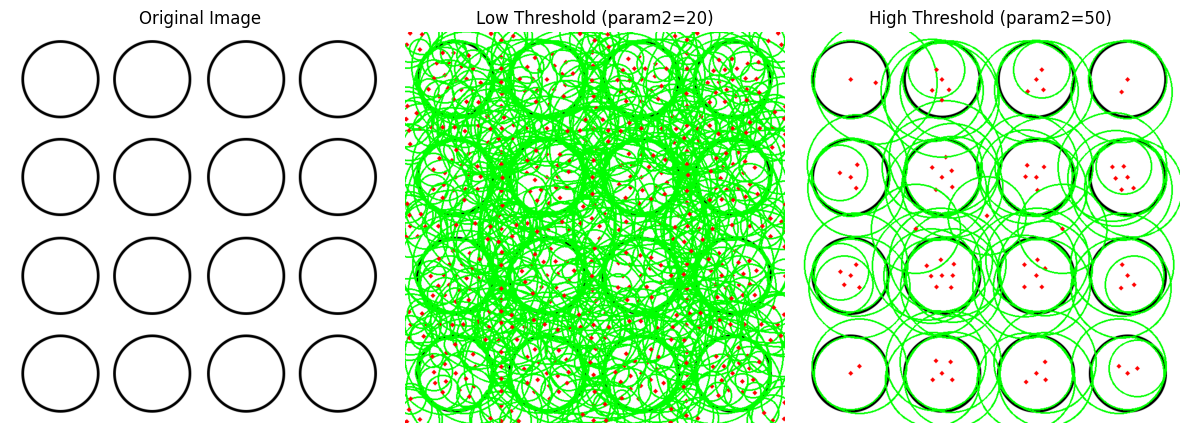

In [8]:
# Experiment with different parameters
_, processed_image_low = detect_circles(image_path, param2=20)
_, processed_image_high = detect_circles(image_path, param2=50)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(processed_image_low, cv2.COLOR_BGR2RGB))
plt.title("Low Threshold (param2=20)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(processed_image_high, cv2.COLOR_BGR2RGB))
plt.title("High Threshold (param2=50)")
plt.axis("off")

plt.tight_layout()
plt.show()


When experimenting with different radius ranges and accumulator thresholds in the Hough Circle Transform, significant improvements in circle detection can be observed depending on the parameter settings. The radius range specifies the minimum and maximum circle sizes to detect. Narrow ranges (e.g., 10–30) focus on detecting smaller circles, which is effective for uniform objects like coins but may miss larger ones. Wider ranges (e.g., 50–100) detect circles of varying sizes, making it suitable for larger or mixed-sized objects but may include false positives.

The accumulator threshold controls the confidence level required to identify a circle. Lower thresholds (e.g., 20) detect faint or partially visible circles, capturing more details but increasing noise and false positives. Higher thresholds (e.g., 60) focus on prominent, well-defined circles, reducing false positives but potentially missing weaker detections. By balancing these parameters, we can optimize circle detection based on the image's characteristics, ensuring clarity and accuracy while minimizing noise. This highlights the importance of tuning parameters to the specific context of the image.

### Task 4: Harris Corner Detection (20 Marks)


#### (a) Create a function to detect and mark corners in an image using the Harris Corner Detection method. Use an appropriate method to mark the detected corners on the original image. (10 Marks)

In [ ]:
def detect_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold=0.01, dot_radius=5):
    
    # Load the image
    original_image = cv2.imread(image_path)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Harris Corner Detection
    grayscale_float = np.float32(grayscale_image)
    harris_response = cv2.cornerHarris(grayscale_float, block_size, ksize, k)

    # Normalize and threshold the response
    harris_response = cv2.dilate(harris_response, None)  # Dilate for better visualization
    threshold_value = threshold * harris_response.max()

    # Create a copy of the original image to mark corners
    marked_image = original_image.copy()

    # Mark corners using circles
    corner_indices = np.argwhere(harris_response > threshold_value)
    for y, x in corner_indices:
        cv2.circle(marked_image, (x, y), dot_radius, (255, 0, 0), -1)  # Red filled circle

    return original_image, marked_image



#### (b) Apply your function to an image with distinct corners, such as a chessboard or a building with strong edges and corners. Display the original and processed images with corners marked. (5 Marks)

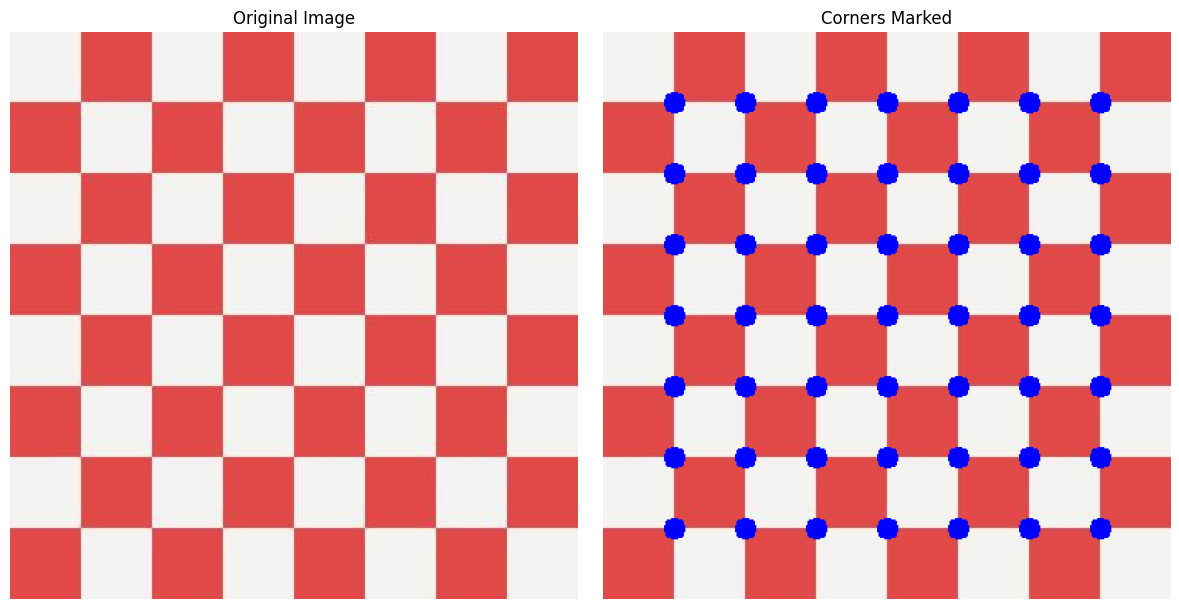

In [ ]:
# Apply the function
image_path = "images_input/checks.jpg"  
original_image, processed_image = detect_harris_corners(
    image_path, block_size=2, ksize=3, k=0.04, threshold=0.01,dot_radius=5
)

# Display the original and processed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.title("Corners Marked")
plt.axis("off")

plt.tight_layout()
plt.show()


#### (c) Vary the sensitivity parameter (typically called k) in the Harris Corner Detection function. Observe how it affects corner detection, showing both original and altered results. Briefly explain your findings in 2-3 sentences. (5 Marks)

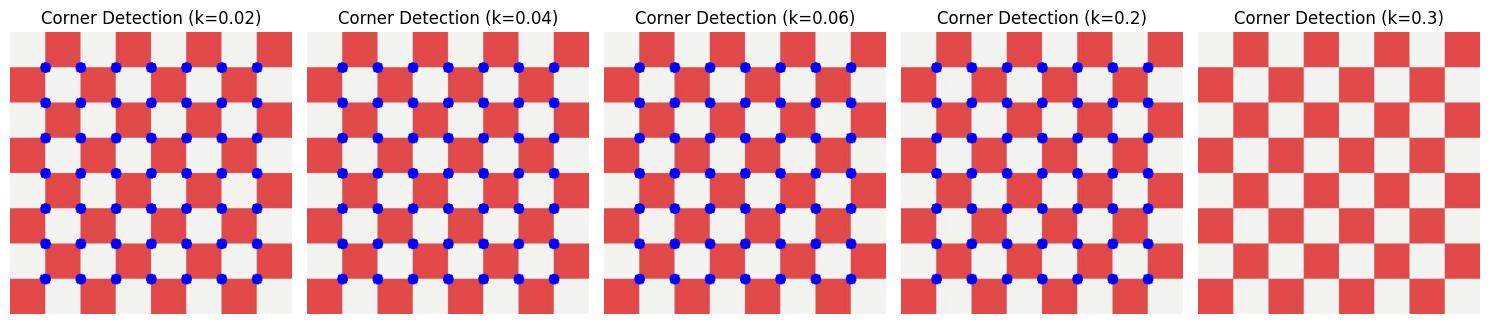

In [37]:
# Test different values of k
k_values = [0.02, 0.04, 0.06, 0.2, 0.3]

plt.figure(figsize=(15, 5))
for i, k in enumerate(k_values):
    _, processed_image = detect_harris_corners(
        image_path, block_size=2, ksize=3, k=k, threshold=0.01
    )
    plt.subplot(1, len(k_values), i + 1)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Corner Detection (k={k})")
    plt.axis("off")

plt.tight_layout()
plt.show()


In **Harris Corner Detection**, varying the sensitivity parameter k (typically in the range of 0.04 to 0.15) significantly affects the corner detection results. Lower values of k make the algorithm more sensitive, detecting a higher number of corners, including weak ones and false positives, especially in noisy regions. As k increases , the algorithm becomes stricter, detecting only strong, well-defined corners while ignoring subtle features or noise.

### Task 5: Short Theory (10 Marks)

#### In 100-150 words, explain how the Hough Transform differs when detecting lines versus circles in an image. Discuss how parameter space and computational complexity vary between these applications. (10 Marks)

The Hough Transform differs in its approach to detecting lines versus circles due to variations in their mathematical representations and parameter spaces. For **lines**, the transform uses a two-dimensional parameter space (ρ, θ), where ρ represents the perpendicular distance from the origin and θ is the angle of inclination. Each edge point in the image maps to a sinusoidal curve in this space, and intersections indicate line candidates.

For **circles**, the parameter space is three-dimensional (a, b, r), representing the circle's center coordinates (a, b) and radius r. Each edge point contributes to a conical surface in this space, making circle detection computationally more complex due to the added dimension.

The increased parameter space for circles requires significantly more storage and computational effort, particularly for detecting circles of varying radii, compared to the relatively simpler 2D space used for lines.